In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

# Step 1

In [2]:
df = pd.read_csv('train_download.csv')

# Step 2

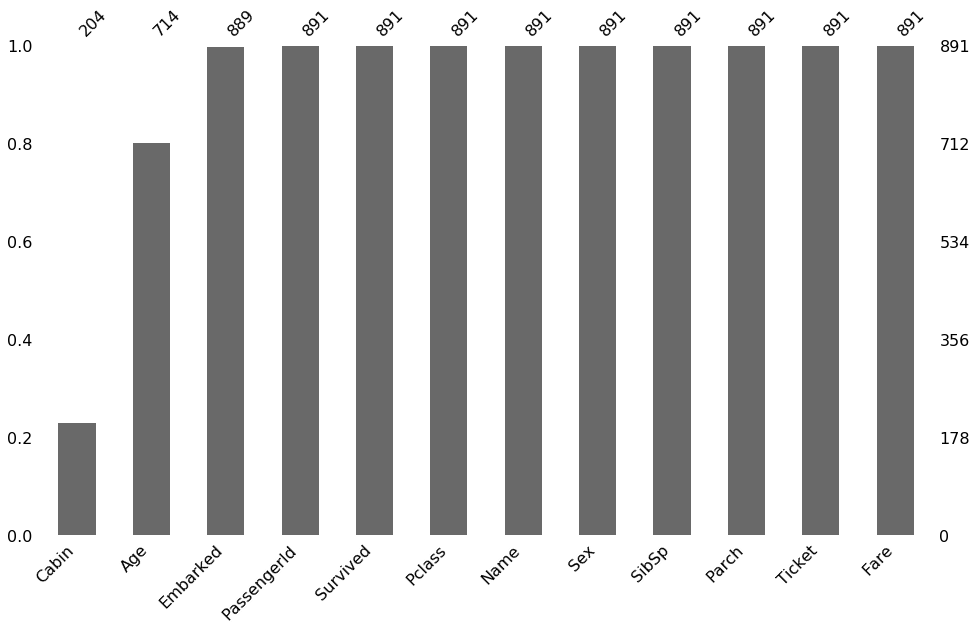

In [3]:
msno.bar(df,figsize=(16,9),sort='ascending');

# Cabin has the most missing values

In [4]:
df.isnull().sum()
# Cabin has 687 missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df = df.dropna(subset=['Embarked'])

In [6]:
df['Cabin'] = df['Cabin'].fillna('¯\(ツ)/¯')

# Step 3

In [7]:
df['FamilyCount'] = df['SibSp'] + df['Parch']

In [8]:
# using map function to find Reverends
def find_rev(name):
    if 'Rev' in name:
        return 1
    else:
        return 0

df['IsReverend'] = df['Name'].map(find_rev)

In [9]:
# create convert Embarked to dummies and concat it to origin dataframe
embarked_dummies = pd.get_dummies(df['Embarked'], prefix = 'Embarked')
df = pd.concat([df,embarked_dummies],axis=1)

In [10]:
# create convert Sex to dummies and concat it to origin dataframe
sex_dummies = pd.get_dummies(df['Sex'], prefix = 'Sex')
df = pd.concat([df,sex_dummies],axis=1)

In [11]:
# using map function to find Titiles by given name
def get_title(name):
    return (name.split(',')[1].split()[0])

df['Title'] = df['Name'].map(get_title)

In [12]:
# create convert Title to dummies and concat it to origin dataframe
title_dummies = pd.get_dummies(df['Title'], prefix = 'Title')
df = pd.concat([df,title_dummies],axis=1)

In [13]:
# Since dummies are created, drop the origin columns
#df = df.drop(['Embarked','Sex','Title'],axis=1)

# Step 4

In [14]:
# Overall Survival rate
str(round(df['Survived'].mean()*100,2)) + ('%')

'38.25%'

In [15]:
# Survival rate for different gender
df.groupby(by=['Sex_male','Sex_female'])['Survived'].mean()

# Male have lower survival rate 18.89%

Sex_male  Sex_female
0         1             0.740385
1         0             0.188908
Name: Survived, dtype: float64

In [16]:
# survival rate for different Pclass
df.groupby(by=['Pclass'])['Survived'].mean()
# 1: 62.62%
# 2: 47.28%
# 3: 24.24%

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [17]:
# See if any reverend survived
df[df['IsReverend'] == 1]['Survived'].sum()

# None of the reverend survived

0

In [18]:
# The survival rate for cabin marked as ¯(ツ)/¯
df[df['Cabin'] == '¯(ツ)/¯']['Survived'].mean()

# No one survived with cabin is ¯(ツ)/¯

nan

In [19]:
# The survival rate for record with missing age
df[df['Age'].isnull()]['Survived'].mean()

# survival rate is 29.38%

0.2937853107344633

In [20]:
# The survival rate for different port of embarkation
df.groupby(by = ['Embarked_S','Embarked_Q','Embarked_C'])['Survived'].mean()

# Embarked_C's survival rate = 55.36%
# Embarked_Q's survival rate = 38.96%
# Embarked_S's survival rate = 33.70%


Embarked_S  Embarked_Q  Embarked_C
0           0           1             0.553571
            1           0             0.389610
1           0           0             0.336957
Name: Survived, dtype: float64

In [21]:
# Survival rate for children (under 12) in each Pclass

df[df['Age'] < 12].groupby(by=['Pclass'])['Survived'].mean()

# Children in class 1: 75.00%
# Children in class 2: 100%
# Children in class 3: 40.43%

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64

In [22]:
df[df['Title_Capt.'] == 1]['Survived']
# Yes, Captain is in the list but he didn't survived

745    0
Name: Survived, dtype: int64

In [23]:
df[(df['Fare'] == df[df['Survived'] == 0]['Fare'].max()) & (df['Survived'] == 0)][['Name','Fare']]
# Mr. Charles Alexander and Mr. Mark have have the most expensive tickets. Costed them $263 each.

,Name,Fare
27,"Fortune, Mr. Charles Alexander",263.0
438,"Fortune, Mr. Mark",263.0


In [24]:
def AnyFamily(num_count):
    if num_count > 0:
        return 'yes'
    else:
        return 'no'

df['IfAnyFamily'] = df['FamilyCount'].map(AnyFamily)

df.groupby('IfAnyFamily')['Survived'].mean()

# People with family member on board have a higher survival rate, so it helps your chances of survival.

IfAnyFamily
no     0.300935
yes    0.505650
Name: Survived, dtype: float64

# Step 5

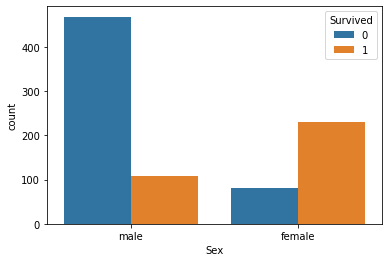

In [44]:
sns.countplot(data=df, x='Sex',hue='Survived');
# We can clearly see that female have way larger suvival rate than male

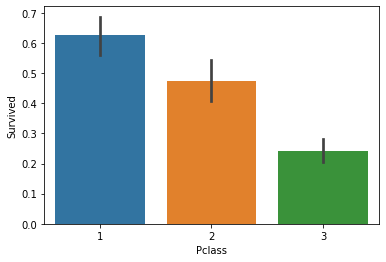

In [54]:
sns.barplot(x='Pclass',y='Survived',data=df);
# class 1 has the highest survived rate among 3 classesb

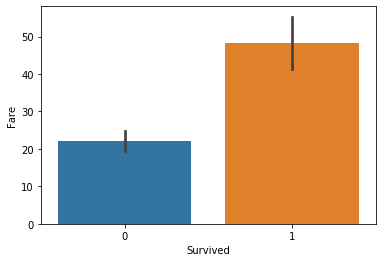

In [48]:
sns.barplot(y="Fare",x="Survived", data=df);
# The height of the barplot shows the average fare for survived and unsurvived. It clearly shows that survived 
# people's fare are higher. Last plot support this beacause more people survived in higher class.